# Imports and settings

In [117]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [118]:
# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', '{:.2f}'.format)

# Initial Data loading and understanding

In [119]:
df = pd.read_csv('../Data Collection/Datasets/nhatot.com/raw/nhatot.csv')
# Select only the specific columns you're interested in
df.head()

Description                         Location    Price  \
0             6 PN ‚Ä¢ Nh√† ng√µ, h·∫ªm   Qu·∫≠n Thanh Xu√¢n ‚Ä¢ 2 ng√†y tr∆∞·ªõc  13,9 t·ª∑   
1             3 PN ‚Ä¢ Nh√† ng√µ, h·∫ªm    Qu·∫≠n Ho√†ng Mai ‚Ä¢ 2 ng√†y tr∆∞·ªõc  13,9 t·ª∑   
2                 1 PN ‚Ä¢ Chung c∆∞     Huy·ªán Gia L√¢m ‚Ä¢ 2 ng√†y tr∆∞·ªõc  13,9 t·ª∑   
3  nhi·ªÅu h∆°n 10 PN ‚Ä¢ Nh√† ng√µ, h·∫ªm  Qu·∫≠n Nam T·ª´ Li√™m ‚Ä¢ 2 ng√†y tr∆∞·ªõc  13,9 t·ª∑   
4             4 PN ‚Ä¢ Nh√† ng√µ, h·∫ªm  Qu·∫≠n Nam T·ª´ Li√™m ‚Ä¢ 2 ng√†y tr∆∞·ªõc  13,9 t·ª∑   

  Price per m¬≤  Space                                              Title  
0    278 tr/m¬≤  50 m¬≤  L√ä TR·ªåNG T·∫§N_THANH XU√ÇN_50M_5 T·∫¶G PH√ÇN L√î_L√î G...  
1    278 tr/m¬≤  50 m¬≤  B√ÅN NH√Ä THANH L√ÇN ‚Äì NH√Ä ƒê·∫∏P 5 T·∫¶N5 ‚Äì NG√ï N√îNG ...  
2    278 tr/m¬≤  50 m¬≤  B√ÅN NHANH CƒÇN 1N +GI√Å 2.250 TR FULL N·ªòI TH·∫§T T...  
3    278 tr/m¬≤  50 m¬≤  CHDV M·ªÑ TR√å_62M2_7T TM_17P KK_D√íNG TI·ªÄN 95TR/T...  
4    278 tr/m¬≤  50 m¬≤  M·ª∏ ƒê√åNH_D√ÇN X√ÇY_39M 4T_50M √î T√î_2 THO√ÅNG_ G·∫¶N ...

In [120]:
print("\nBasic information:")
df.info()


Basic information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3875 entries, 0 to 3874
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Description   3875 non-null   object
 1   Location      3875 non-null   object
 2   Price         3875 non-null   object
 3   Price per m¬≤  3875 non-null   object
 4   Space         3875 non-null   object
 5   Title         3875 non-null   object
dtypes: object(6)
memory usage: 181.8+ KB


In [121]:
print("\nSummary statistics:")
df.describe()


Summary statistics:


Description                Location    Price Price per m¬≤  \
count                  3875                    3875     3875         3875   
unique                  246                     396      141          144   
top     3 PN ‚Ä¢ Nh√† ng√µ, h·∫ªm  Qu·∫≠n H√† ƒê√¥ng ‚Ä¢ h√¥m qua  13,9 t·ª∑    169 tr/m¬≤   
freq                    723                     152      100           80   

        Space                                    Title  
count    3875                                     3875  
unique     63                                     2685  
top     50 m¬≤  C·∫¶N B√ÅN NH√Ä TH·∫†CH B√ÄN LONG BI√äN H√Ä N·ªòI.  
freq      280                                       11

## Duplicate

In [122]:
# Check for duplicates
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")


Number of duplicate rows: 4


In [123]:
if duplicates > 0:
    df = df.drop_duplicates()
    print(f"Duplicates removed. New number of rows: {len(df)}")

Duplicates removed. New number of rows: 3871


## Convert Description and Location into Bedrooms and Date

In [124]:
# Extract bedrooms and property type from Description
def extract_from_description(desc_str):
    """
    Extract number of bedrooms and property type from description string
    Expected format: "X PN ‚Ä¢ Property Type"
    """
    if pd.isna(desc_str):
        return np.nan, None
    
    desc_str = str(desc_str).strip()
    
    # Extract number of bedrooms (PN)
    bedroom_match = re.search(r'(\d+)\s*PN', desc_str)
    bedrooms = int(bedroom_match.group(1)) if bedroom_match else np.nan
    
    # Extract property type (after "‚Ä¢")
    property_parts = desc_str.split('‚Ä¢')
    property_type = property_parts[1].strip() if len(property_parts) > 1 else None
    
    return bedrooms, property_type

# Extract district and date posted from Location
def extract_from_location(location_str):
    """
    Extract district and posting date from location string
    Expected format: "District ‚Ä¢ Date"
    """
    if pd.isna(location_str):
        return None, None
    
    location_str = str(location_str).strip()
    parts = location_str.split('‚Ä¢')
    
    district = parts[0].strip() if len(parts) >= 1 else None
    date_posted = parts[1].strip() if len(parts) > 1 else None
    
    return district, date_posted

# Apply the extraction functions
df['bedrooms'], df['property_type'] = zip(*df['Description'].apply(extract_from_description))
df['district_name'], df['date_posted'] = zip(*df['Location'].apply(extract_from_location))

# Display the results
print("\nExtracted fields from Description and Location:")
print(df[['Description', 'bedrooms', 'property_type', 
          'Location', 'district_name', 'date_posted']].head(10))


Extracted fields from Description and Location:
                      Description  bedrooms property_type  \
0             6 PN ‚Ä¢ Nh√† ng√µ, h·∫ªm      6.00  Nh√† ng√µ, h·∫ªm   
1             3 PN ‚Ä¢ Nh√† ng√µ, h·∫ªm      3.00  Nh√† ng√µ, h·∫ªm   
2                 1 PN ‚Ä¢ Chung c∆∞      1.00      Chung c∆∞   
3  nhi·ªÅu h∆°n 10 PN ‚Ä¢ Nh√† ng√µ, h·∫ªm     10.00  Nh√† ng√µ, h·∫ªm   
4             4 PN ‚Ä¢ Nh√† ng√µ, h·∫ªm      4.00  Nh√† ng√µ, h·∫ªm   
5          ƒê·∫•t th·ªï c∆∞ ‚Ä¢ Ngang 5 m       NaN     Ngang 5 m   
6                 2 PN ‚Ä¢ Chung c∆∞      2.00      Chung c∆∞   
7                 3 PN ‚Ä¢ Chung c∆∞      3.00      Chung c∆∞   
8             2 PN ‚Ä¢ Nh√† ng√µ, h·∫ªm      2.00  Nh√† ng√µ, h·∫ªm   
9             3 PN ‚Ä¢ Nh√† ng√µ, h·∫ªm      3.00  Nh√† ng√µ, h·∫ªm   

                           Location      district_name   date_posted  
0    Qu·∫≠n Thanh Xu√¢n ‚Ä¢ 2 ng√†y tr∆∞·ªõc    Qu·∫≠n Thanh Xu√¢n  2 ng√†y tr∆∞·ªõc  
1     Qu·∫≠n Ho√†ng Mai ‚Ä¢ 2 ng√†y tr

## Missing value

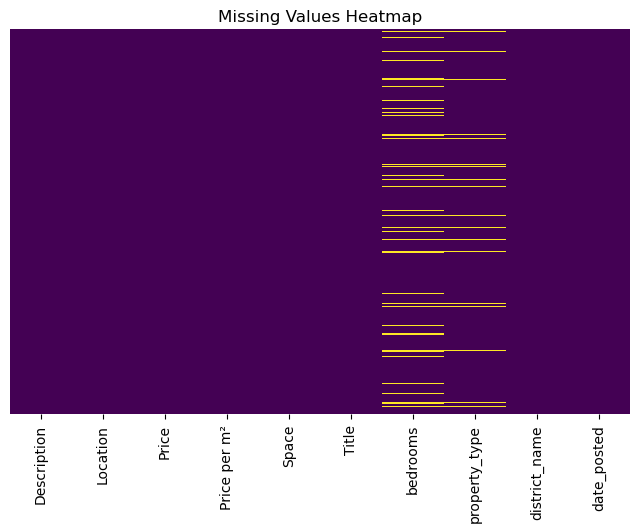

In [125]:
plt.figure(figsize=(8,5))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [126]:
# Re-check for missing values in extracted components from Description and Location
print("\nMissing values in extracted components after processing:")
missing_components_updated = df[['bedrooms', 'property_type', 'district_name', 'date_posted']].isnull().sum()
print(missing_components_updated)

# Display rows where bedrooms could not be extracted
print("\nRows where 'bedrooms' could not be extracted (first 5):")
print(df[df['bedrooms'].isnull()][['Description', 'Title']].head())

# Display rows where property_type could not be extracted
print("\nRows where 'property_type' could not be extracted (first 5):")
print(df[df['property_type'].isnull()][['Description', 'Title']].head())

# Display rows where district_name could not be extracted
print("\nRows where 'district_name' could not be extracted (first 5):")
print(df[df['district_name'].isnull()][['Location', 'Title']].head())

# Display rows where date_posted could not be extracted
print("\nRows where 'date_posted' could not be extracted (first 5):")
print(df[df['date_posted'].isnull()][['Location', 'Title']].head())

# Calculate percentage of complete extraction for each field
print("\nPercentage of rows with successful extraction:")
total_rows = len(df)
print(f"bedrooms: {(total_rows - df['bedrooms'].isnull().sum()) / total_rows * 100:.2f}%")
print(f"property_type: {(total_rows - df['property_type'].isnull().sum()) / total_rows * 100:.2f}%")
print(f"district_name: {(total_rows - df['district_name'].isnull().sum()) / total_rows * 100:.2f}%")
print(f"date_posted: {(total_rows - df['date_posted'].isnull().sum()) / total_rows * 100:.2f}%")

# Create a column for complete extraction (where all components were found)
df['extraction_complete'] = df[['bedrooms', 'property_type', 'district_name', 'date_posted']].notnull().all(axis=1)
print(f"\nRows with all components extracted: {df['extraction_complete'].sum()} ({df['extraction_complete'].mean()*100:.2f}%)")


Missing values in extracted components after processing:
bedrooms         466
property_type    168
district_name      0
date_posted        0
dtype: int64

Rows where 'bedrooms' could not be extracted (first 5):
               Description                                              Title
5   ƒê·∫•t th·ªï c∆∞ ‚Ä¢ Ngang 5 m     CC c·∫ßn b√°n ƒë·∫•t H·ª£p Ti·∫øn s√°t H·ªì Quan S∆°n 1000ha
15  ƒê·∫•t th·ªï c∆∞ ‚Ä¢ Ngang 5 m  CC C·∫ßn b√°n nhanh l√¥ ƒë·∫•t An Ti·∫øn, s√°t ngay 3 tr...
21              ƒê·∫•t th·ªï c∆∞  L·∫†I ƒê√Ä- ƒê√îNG H·ªòI, H√ÄNG X√ìM VIN C·ªî LOA- HI·∫æM ƒê·∫§...
26  ƒê·∫•t th·ªï c∆∞ ‚Ä¢ Ngang 4 m  B√°n ƒë·∫•t Ba La,ng√µ ga,ng√µ th√¥ng,g·∫ßn √¥ t√¥ tr√°nh,...
65  ƒê·∫•t th·ªï c∆∞ ‚Ä¢ Ngang 5 m  B√°n l√¥ ƒë·∫•t 46m2 t·∫°i Kim Hoa - V·ªã tr√≠ ƒë·∫πp, ti·ªÅm...

Rows where 'property_type' could not be extracted (first 5):
    Description                                              Title
21   ƒê·∫•t th·ªï c∆∞  L·∫†I ƒê√Ä- ƒê√îNG H·ªòI, H√ÄNG X√ìM VIN C·ªî LOA- HI·∫æM ƒê·∫

# Type conversion

In [127]:
df.head()

Description                         Location    Price  \
0             6 PN ‚Ä¢ Nh√† ng√µ, h·∫ªm   Qu·∫≠n Thanh Xu√¢n ‚Ä¢ 2 ng√†y tr∆∞·ªõc  13,9 t·ª∑   
1             3 PN ‚Ä¢ Nh√† ng√µ, h·∫ªm    Qu·∫≠n Ho√†ng Mai ‚Ä¢ 2 ng√†y tr∆∞·ªõc  13,9 t·ª∑   
2                 1 PN ‚Ä¢ Chung c∆∞     Huy·ªán Gia L√¢m ‚Ä¢ 2 ng√†y tr∆∞·ªõc  13,9 t·ª∑   
3  nhi·ªÅu h∆°n 10 PN ‚Ä¢ Nh√† ng√µ, h·∫ªm  Qu·∫≠n Nam T·ª´ Li√™m ‚Ä¢ 2 ng√†y tr∆∞·ªõc  13,9 t·ª∑   
4             4 PN ‚Ä¢ Nh√† ng√µ, h·∫ªm  Qu·∫≠n Nam T·ª´ Li√™m ‚Ä¢ 2 ng√†y tr∆∞·ªõc  13,9 t·ª∑   

  Price per m¬≤  Space                                              Title  \
0    278 tr/m¬≤  50 m¬≤  L√ä TR·ªåNG T·∫§N_THANH XU√ÇN_50M_5 T·∫¶G PH√ÇN L√î_L√î G...   
1    278 tr/m¬≤  50 m¬≤  B√ÅN NH√Ä THANH L√ÇN ‚Äì NH√Ä ƒê·∫∏P 5 T·∫¶N5 ‚Äì NG√ï N√îNG ...   
2    278 tr/m¬≤  50 m¬≤  B√ÅN NHANH CƒÇN 1N +GI√Å 2.250 TR FULL N·ªòI TH·∫§T T...   
3    278 tr/m¬≤  50 m¬≤  CHDV M·ªÑ TR√å_62M2_7T TM_17P KK_D√íNG TI·ªÄN 95TR/T...   
4    278 tr/m¬≤  50 m¬≤  M·ª∏ ƒê√åNH_D√ÇN X√ÇY_39M 4T_50M √î T√î_2 THO√ÅNG_ G·∫¶N ...   

   bedrooms property_type     district_name   date_posted  extraction_complete  
0      6.00  Nh√† ng√µ, h·∫ªm   Qu·∫≠n Thanh Xu√¢n  2 ng√†y tr∆∞·ªõc                 True  
1      3.00  Nh√† ng√µ, h·∫ªm    Qu·∫≠n Ho√†ng Mai  2 ng√†y tr∆∞·ªõc                 True  
2      1.00      Chung c∆∞     Huy·ªán Gia L√¢m  2 ng√†y tr∆∞·ªõc                 True  
3     10.00  Nh√† ng√µ, h·∫ªm  Qu·∫≠n Nam T·ª´ Li√™m  2 ng√†y tr∆∞·ªõc                 True  
4      4.00  Nh√† ng√µ, h·∫ªm  Qu·∫≠n Nam T·ª´ Li√™m  2 ng√†y tr∆∞·ªõc                 True

In [128]:
# Analyze the Description field for patterns including "Ngang"
print("Analyzing property type patterns in Description field...")

# Check for property types with "ƒê·∫•t th·ªï c∆∞"
dat_tho_cu_count = df['Description'].str.contains('ƒê·∫•t th·ªï c∆∞', na=False).sum()
print(f"\nProperties described as 'ƒê·∫•t th·ªï c∆∞': {dat_tho_cu_count} ({dat_tho_cu_count/len(df)*100:.2f}%)")

# Check for descriptions containing "Ngang"
ngang_count = df['Description'].str.contains('Ngang', na=False).sum()
print(f"Descriptions containing 'Ngang': {ngang_count} ({ngang_count/len(df)*100:.2f}%)")

# Check for the specific pattern "ƒê·∫•t th·ªï c∆∞ ‚Ä¢ Ngang X m"
pattern_count = df['Description'].str.contains('ƒê·∫•t th·ªï c∆∞.*Ngang', na=False).sum()
print(f"Properties with pattern 'ƒê·∫•t th·ªï c∆∞.*Ngang': {pattern_count} ({pattern_count/len(df)*100:.2f}%)")

# Extract and count the different property types based on the first part of the description
print("\nMost common property types in descriptions:")
property_types = df['property_type'].value_counts()
print(property_types.head(10))  # Top 10 property types

Analyzing property type patterns in Description field...

Properties described as 'ƒê·∫•t th·ªï c∆∞': 407 (10.51%)
Descriptions containing 'Ngang': 285 (7.36%)
Properties with pattern 'ƒê·∫•t th·ªï c∆∞.*Ngang': 262 (6.77%)

Most common property types in descriptions:
property_type
Nh√† ng√µ, h·∫ªm             1852
Chung c∆∞                  485
Nh√† m·∫∑t ph·ªë, m·∫∑t ti·ªÅn     405
H∆∞·ªõng ƒê√¥ng Nam            119
T·∫≠p th·ªÉ, c∆∞ x√°             82
Ngang 5 m                  78
H∆∞·ªõng T√¢y B·∫Øc              76
H∆∞·ªõng T√¢y Nam              64
H∆∞·ªõng ƒê√¥ng B·∫Øc             56
Nh√† ph·ªë li·ªÅn k·ªÅ            56
Name: count, dtype: int64


## Explore date


--- Date Posted Analysis ---

Most common date_posted values:
date_posted
h√¥m qua         1288
2 ng√†y tr∆∞·ªõc     661
3 ng√†y tr∆∞·ªõc     635
4 ng√†y tr∆∞·ªõc     543
22 gi·ªù tr∆∞·ªõc      72
14 gi·ªù tr∆∞·ªõc      56
23 gi·ªù tr∆∞·ªõc      48
16 gi·ªù tr∆∞·ªõc      47
19 gi·ªù tr∆∞·ªõc      46
21 gi·ªù tr∆∞·ªõc      44
Name: count, dtype: int64

Distribution of time units:
time_unit
days       1841
h√¥m qua    1288
hours       713
minutes      29
Name: count, dtype: int64

Time Count Statistics:
count   2583.00
mean       6.57
std        7.23
min        1.00
25%        2.00
50%        3.00
75%        4.00
max       58.00
Name: time_count, dtype: float64


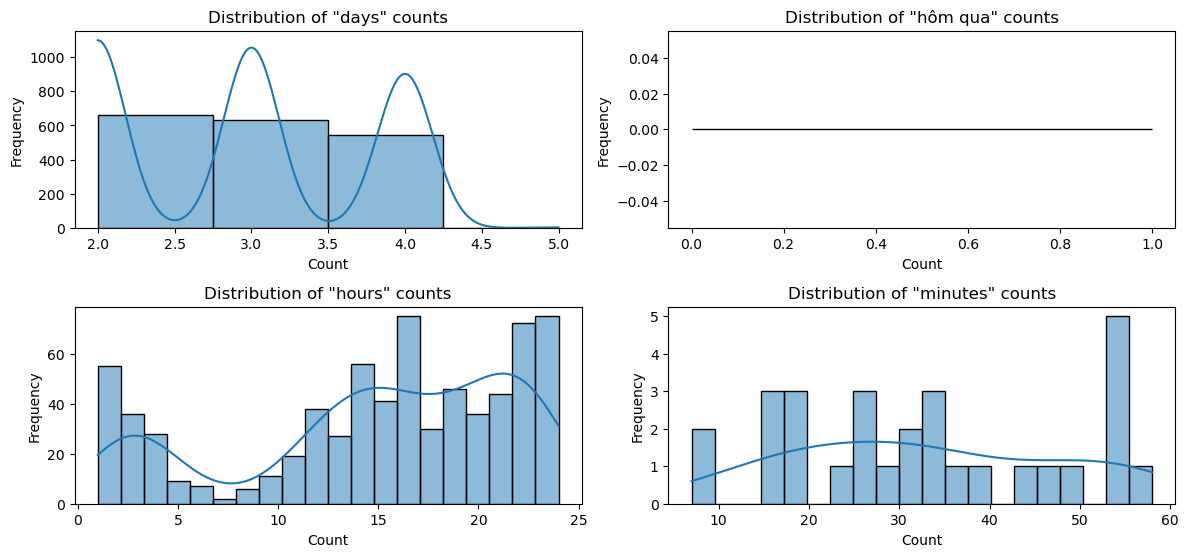

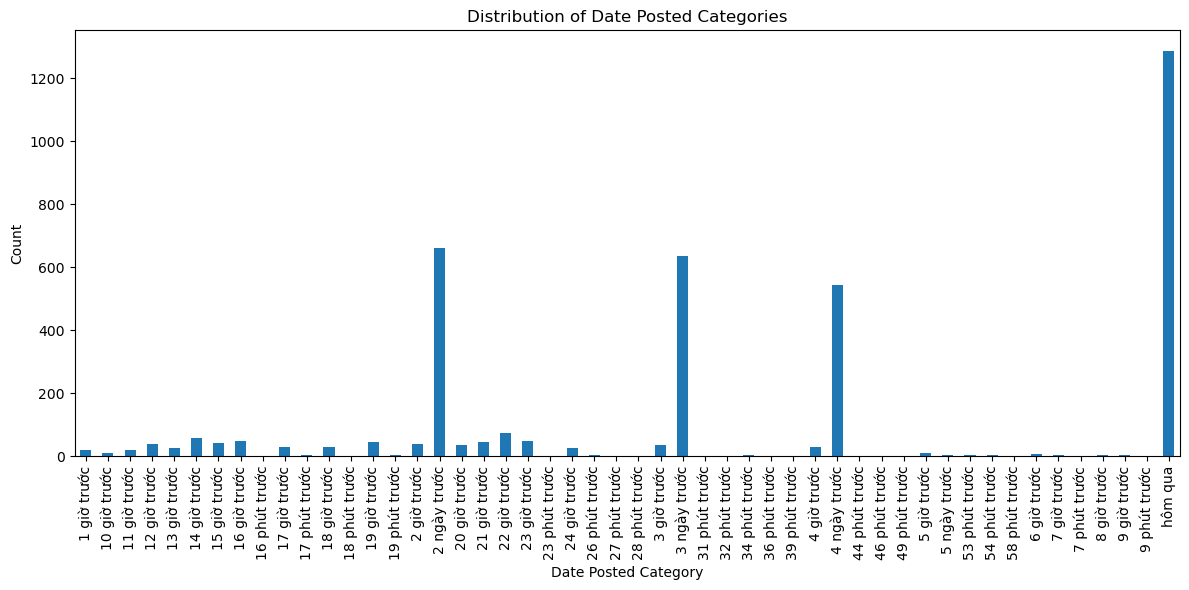


Average price by time period:
time_unit
days      19.61
h√¥m qua   19.42
hours     11.63
minutes    7.43
Name: numeric_price, dtype: float64


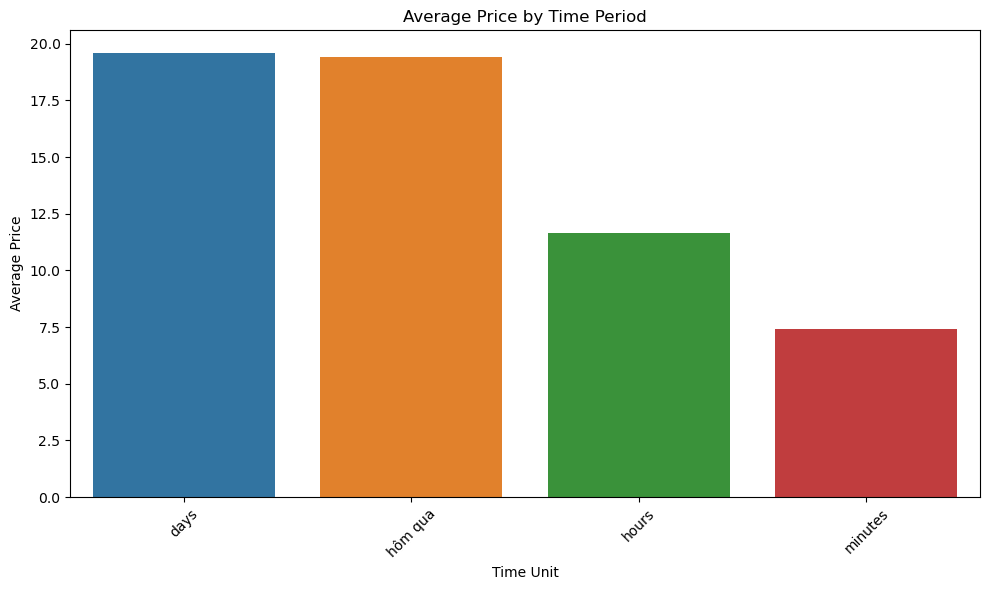


Properties posted within hours (713 listings):
                                                Title   date_posted  \
40  View Hai Con R·ªìng H·ªì T√¢y ‚Äì gi√° "con ong" üêù Ch·ªß...  24 gi·ªù tr∆∞·ªõc   
41  Nh√† l√¥ g√≥c Ph√∫ l∆∞∆°ng 33m-5T full ƒë·ªì ƒë·ªÉ l·∫°i n·ªôi...  24 gi·ªù tr∆∞·ªõc   
42  B√°n nh√† M·ªπ ƒê√¨nh Tr·∫ßn H·ªØu D·ª±c 60m2 7T 20P Doanh...  24 gi·ªù tr∆∞·ªõc   
43  Ch√≠nh ch·ªß b√°n nh√† ƒê√¨nh Th√¥n 40m2 5T x√¢y m·ªõi ng...  24 gi·ªù tr∆∞·ªõc   
44  B√°n nh√† M·ªπ ƒê√¨nh 36m2 5 T·∫ßng 80m ƒë∆∞·ªùng √î t√¥ tr√°...  24 gi·ªù tr∆∞·ªõc   
45  B√°n nh√† ƒê·ª©c Di·ªÖn B·∫Øc T·ª´ Li√™m 40m2 5T 50m ƒë∆∞·ªùng...  24 gi·ªù tr∆∞·ªõc   
46  M·∫∑t ph·ªë Tr·∫ßn Ph√∫ Hƒê 58m2, 5T , v·ªâa h√® 5m gi√° c...  24 gi·ªù tr∆∞·ªõc   
47  Ch√≠nh ch·ªß b√°n nh√† Th√°i Th·ªãnh,v·ªã tr√≠ v√†ng 71m2 ...  24 gi·ªù tr∆∞·ªõc   
48  B√°n cƒÉn h·ªô Ecohome Ph√∫c L·ª£i - Long Bi√™n - 78m¬≤...  24 gi·ªù tr∆∞·ªõc   
49  CH·ªà 2 T·ª∂600TR NH·∫¨N NGAY CƒÇN 2PN1VS DT 60M FULL...  24 gi·ªù tr∆∞·ªõc  

In [129]:
# Explore date_posted field
print("\n--- Date Posted Analysis ---")

# 1. Check unique values and counts
print("\nMost common date_posted values:")
date_counts = df['date_posted'].value_counts().head(10)
print(date_counts)

# 2. Convert relative time descriptions to standard time periods
def categorize_time_period(date_str):
    if pd.isna(date_str):
        return None, None
    
    # Extract time units and counts using regex
    time_match = re.search(r'(\d+)\s+(gi√¢y|ph√∫t|gi·ªù|ng√†y|tu·∫ßn|th√°ng|nƒÉm)\s+tr∆∞·ªõc', date_str)
    if not time_match:
        return date_str, None
    
    count = int(time_match.group(1))
    unit = time_match.group(2)
    
    # Map Vietnamese time units to English
    unit_mapping = {
        'gi√¢y': 'seconds',
        'ph√∫t': 'minutes',
        'gi·ªù': 'hours',
        'ng√†y': 'days',
        'tu·∫ßn': 'weeks',
        'th√°ng': 'months',
        'nƒÉm': 'years'
    }
    
    return unit_mapping.get(unit, unit), count

# Apply the function to extract time units and counts
df['time_unit'], df['time_count'] = zip(*df['date_posted'].apply(categorize_time_period))

# 3. Analyze distribution of time units
print("\nDistribution of time units:")
time_unit_counts = df['time_unit'].value_counts()
print(time_unit_counts)

# 4. Check for potential outliers in the time counts
if 'time_count' in df.columns and df['time_count'].notna().any():
    print("\nTime Count Statistics:")
    print(df['time_count'].describe())
    
    # Visualize distribution of time counts by unit
    plt.figure(figsize=(12, 8))
    
    # Create subplots for each time unit
    time_units = df['time_unit'].unique()
    time_units = [unit for unit in time_units if pd.notna(unit)]
    
    subplot_rows = min(len(time_units), 3)
    subplot_cols = (len(time_units) + subplot_rows - 1) // subplot_rows
    
    for i, unit in enumerate(time_units, 1):
        unit_counts = df[df['time_unit'] == unit]['time_count']
        
        plt.subplot(subplot_rows, subplot_cols, i)
        if len(unit_counts) > 1:  # Only plot if there's more than one value
            sns.histplot(unit_counts, kde=True, bins=min(20, len(unit_counts.unique())))
        else:
            plt.text(0.5, 0.5, f"Only one value: {unit_counts.iloc[0]}", 
                     ha='center', va='center', fontsize=12)
        plt.title(f'Distribution of "{unit}" counts')
        plt.xlabel('Count')
        plt.ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()

    # 5. Identify potential outliers using IQR method
    for unit in time_units:
        unit_counts = df[df['time_unit'] == unit]['time_count']
        if len(unit_counts) > 10:  # Only check if we have enough data
            Q1 = unit_counts.quantile(0.25)
            Q3 = unit_counts.quantile(0.75)
            IQR = Q3 - Q1
            outlier_low = Q1 - 1.5 * IQR
            outlier_high = Q3 + 1.5 * IQR
            
            outliers = unit_counts[(unit_counts < outlier_low) | (unit_counts > outlier_high)]
            if len(outliers) > 0:
                print(f"\nPotential outliers for '{unit}':")
                print(f"  Lower threshold: {outlier_low}, Upper threshold: {outlier_high}")
                print(f"  Outlier counts: {outliers.value_counts().to_dict()}")
                print(f"  Number of outliers: {len(outliers)} ({len(outliers)/len(unit_counts)*100:.2f}% of {unit} entries)")

# 6. Create a histogram of date_posted categories
plt.figure(figsize=(12, 6))
df['date_posted'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Date Posted Categories')
plt.xlabel('Date Posted Category')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# 7. Compare property characteristics by date_posted
if 'time_unit' in df.columns:
    print("\nAverage price by time period:")
    try:
        # Check if we can extract price in numeric form
        price_pattern = r'(\d+[,\.]?\d*)\s*(t·ª∑|tri·ªáu)'
        df['numeric_price'] = df['Price'].str.extract(price_pattern).iloc[:, 0].str.replace(',', '.').astype(float)
        
        avg_price_by_time = df.groupby('time_unit')['numeric_price'].mean().sort_values(ascending=False)
        print(avg_price_by_time)
        
        plt.figure(figsize=(10, 6))
        sns.barplot(x=avg_price_by_time.index, y=avg_price_by_time.values)
        plt.title('Average Price by Time Period')
        plt.xlabel('Time Unit')
        plt.ylabel('Average Price')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
    except:
        print("Could not analyze price by time period")

# 8. Analyze most recently posted listings
most_recent = df[df['time_unit'] == 'hours']
if len(most_recent) > 0:
    print(f"\nProperties posted within hours ({len(most_recent)} listings):")
    print(most_recent[['Title', 'date_posted', 'district_name', 'property_type']].head(10))

# 9. Analyze oldest listings
oldest_unit_order = {'years': 1, 'months': 2, 'weeks': 3, 'days': 4, 'hours': 5, 'minutes': 6, 'seconds': 7}
if 'time_unit' in df.columns and df['time_unit'].notna().any():
    df['time_unit_order'] = df['time_unit'].map(oldest_unit_order)
    oldest = df.sort_values(['time_unit_order', 'time_count'], ascending=[True, False])
    print(f"\nOldest listings:")
    print(oldest[['Title', 'date_posted', 'district_name', 'property_type']].head(10))
    
    # Clean up
    df.drop('time_unit_order', axis=1, inplace=True)

## Retain the needed field

In [130]:
df = df[['Price', 'Price per m¬≤', 'Space', 'Title', 'bedrooms', 'property_type', 'district_name']]

In [131]:
df.head()

Price Price per m¬≤  Space  \
0  13,9 t·ª∑    278 tr/m¬≤  50 m¬≤   
1  13,9 t·ª∑    278 tr/m¬≤  50 m¬≤   
2  13,9 t·ª∑    278 tr/m¬≤  50 m¬≤   
3  13,9 t·ª∑    278 tr/m¬≤  50 m¬≤   
4  13,9 t·ª∑    278 tr/m¬≤  50 m¬≤   

                                               Title  bedrooms property_type  \
0  L√ä TR·ªåNG T·∫§N_THANH XU√ÇN_50M_5 T·∫¶G PH√ÇN L√î_L√î G...      6.00  Nh√† ng√µ, h·∫ªm   
1  B√ÅN NH√Ä THANH L√ÇN ‚Äì NH√Ä ƒê·∫∏P 5 T·∫¶N5 ‚Äì NG√ï N√îNG ...      3.00  Nh√† ng√µ, h·∫ªm   
2  B√ÅN NHANH CƒÇN 1N +GI√Å 2.250 TR FULL N·ªòI TH·∫§T T...      1.00      Chung c∆∞   
3  CHDV M·ªÑ TR√å_62M2_7T TM_17P KK_D√íNG TI·ªÄN 95TR/T...     10.00  Nh√† ng√µ, h·∫ªm   
4  M·ª∏ ƒê√åNH_D√ÇN X√ÇY_39M 4T_50M √î T√î_2 THO√ÅNG_ G·∫¶N ...      4.00  Nh√† ng√µ, h·∫ªm   

      district_name  
0   Qu·∫≠n Thanh Xu√¢n  
1    Qu·∫≠n Ho√†ng Mai  
2     Huy·ªán Gia L√¢m  
3  Qu·∫≠n Nam T·ª´ Li√™m  
4  Qu·∫≠n Nam T·ª´ Li√™m

## Unit explore

### Units for Price, Price/m2, Space

In [132]:
# Explore price, price per m¬≤, and space fields for unit patterns
print("=== Unit Exploration ===")

# Sample of original values
print("\nOriginal Values (sample):")
print("Price examples:", df['Price'].head().tolist())
print("Price per m¬≤ examples:", df['Price per m¬≤'].head().tolist())
print("Space examples:", df['Space'].head().tolist())

# Check unique units in Price field
price_units = []
for price in df['Price'].dropna().unique():
    if isinstance(price, str):
        unit_match = re.search(r'[^\d,.]+$', price.strip())
        if unit_match:
            unit = unit_match.group().strip()
            if unit not in price_units:
                price_units.append(unit)

print("\nUnique units found in Price field:", price_units)

# Check unique units in Price per m¬≤ field
price_per_m2_units = []
for price in df['Price per m¬≤'].dropna().unique():
    if isinstance(price, str):
        unit_match = re.search(r'[^\d,.]+$', price.strip())
        if unit_match:
            unit = unit_match.group().strip()
            if unit not in price_per_m2_units:
                price_per_m2_units.append(unit)

print("Unique units found in Price per m¬≤ field:", price_per_m2_units)

# Check unique units in Space field
space_units = []
for space in df['Space'].dropna().unique():
    if isinstance(space, str):
        unit_match = re.search(r'[^\d,.]+$', space.strip())
        if unit_match:
            unit = unit_match.group().strip()
            if unit not in space_units:
                space_units.append(unit)

print("Unique units found in Space field:", space_units)

=== Unit Exploration ===

Original Values (sample):
Price examples: ['13,9 t·ª∑', '13,9 t·ª∑', '13,9 t·ª∑', '13,9 t·ª∑', '13,9 t·ª∑']
Price per m¬≤ examples: ['278 tr/m¬≤', '278 tr/m¬≤', '278 tr/m¬≤', '278 tr/m¬≤', '278 tr/m¬≤']
Space examples: ['50 m¬≤', '50 m¬≤', '50 m¬≤', '50 m¬≤', '50 m¬≤']

Unique units found in Price field: ['t·ª∑', 'tri·ªáu']
Unique units found in Price per m¬≤ field: ['tr/m¬≤']
Unique units found in Space field: ['m¬≤']


### Extract the unit out

In [133]:
# Create numeric conversion functions
def extract_numeric_price(price_str):
    """
    Extract numeric price value and convert to billions VND
    """
    if pd.isna(price_str):
        return np.nan
    
    price_str = str(price_str).strip()
    
    # Extract numeric part and handle Vietnamese number format
    numeric_match = re.search(r'([\d,.]+)', price_str)
    if not numeric_match:
        return np.nan
    
    # Convert to float, handling comma as decimal separator if needed
    numeric_value = numeric_match.group(1).replace(',', '.')
    try:
        value = float(numeric_value)
    except ValueError:
        return np.nan
    
    # Convert based on unit
    if 't·ª∑' in price_str:
        # Convert to millions
        return value * 1000.0
    elif 'tri·ªáu' in price_str or 'tr' in price_str:
        # Alr in millions
        return value 
    else:
        # Assume already in mil
        return value

def extract_numeric_price_per_m2(price_str):
    """
    Extract numeric price per m¬≤ value and convert to millions VND/m¬≤
    """
    if pd.isna(price_str):
        return np.nan
    
    price_str = str(price_str).strip()
    
    # Extract numeric part
    numeric_match = re.search(r'([\d,.]+)', price_str)
    if not numeric_match:
        return np.nan
    
    # Convert to float, handling comma as decimal separator if needed
    numeric_value = numeric_match.group(1).replace(',', '.')
    try:
        value = float(numeric_value)
    except ValueError:
        return np.nan
    
    # Handle units - tr/m¬≤ is already in millions per m¬≤
    if 'tr/m¬≤' in price_str or 'tr/m2' in price_str or 'tri·ªáu/m¬≤' in price_str:
        return value
    elif 't·ª∑/m¬≤' in price_str:
        # Convert billions/m¬≤ to millions/m¬≤
        return value * 1000.0
    else:
        # Assume already in millions/m¬≤ if no unit is found
        return value

def extract_numeric_space(space_str):
    """
    Extract numeric space value in m¬≤
    """
    if pd.isna(space_str):
        return np.nan
    
    space_str = str(space_str).strip()
    
    # Extract numeric part
    numeric_match = re.search(r'([\d,.]+)', space_str)
    if not numeric_match:
        return np.nan
    
    # Convert to float, handling comma as decimal separator if needed
    numeric_value = numeric_match.group(1).replace(',', '.')
    try:
        value = float(numeric_value)
    except ValueError:
        return np.nan
    
    # Handle units
    if 'm¬≤' in space_str or 'm2' in space_str:
        return value
    elif 'ha' in space_str:
        # Convert hectares to m¬≤
        return value * 10000.0
    else:
        # Assume already in m¬≤ if no unit is found
        return value

# Apply conversions
df['price_numeric'] = df['Price'].apply(extract_numeric_price)
df['price_per_m2'] = df['Price per m¬≤'].apply(extract_numeric_price_per_m2)
df['area'] = df['Space'].apply(extract_numeric_space)

# Display results
print("\n=== Conversion Results ===")
print("\nSample of converted values:")
comparison_df = pd.DataFrame({
    'Original Price': df['Price'].head(10),
    'Price (millions VND)': df['price_numeric'].head(10),
    'Original Price per m¬≤': df['Price per m¬≤'].head(10),
    'Price per m¬≤ (millions VND)': df['price_per_m2'].head(10),
    'Original Space': df['Space'].head(10),
    'Space (m¬≤)': df['area'].head(10)
})
print(comparison_df)

# Check summary statistics for numeric fields
print("\nSummary statistics for converted numeric fields:")
print("\nPrice (millions VND):")
print(df['price_numeric'].describe())
print("\nPrice per m¬≤ (millions VND):")
print(df['price_per_m2'].describe())
print("\nSpace (m¬≤):")
print(df['area'].describe())

# Check for potential conversion errors (where original has a value but numeric is NaN)
print("\nPossible conversion errors for Price:")
price_errors = df[(df['Price'].notna()) & (df['price_numeric'].isna())]
if not price_errors.empty:
    print(price_errors[['Price', 'Title']].head())
else:
    print("None found")

print("\nPossible conversion errors for Price per m¬≤:")
price_per_m2_errors = df[(df['Price per m¬≤'].notna()) & (df['price_per_m2'].isna())]
if not price_per_m2_errors.empty:
    print(price_per_m2_errors[['Price per m¬≤', 'Title']].head())
else:
    print("None found")

print("\nPossible conversion errors for Space:")
space_errors = df[(df['Space'].notna()) & (df['area'].isna())]
if not space_errors.empty:
    print(space_errors[['Space', 'Title']].head())
else:
    print("None found")

# Create a clean dataframe with the processed fields
df_clean = df.copy()
df_clean['Price'] = df['price_numeric']
df_clean['Price per m¬≤'] = df['price_per_m2'] 
df_clean['Space'] = df['area']

# Drop the temporary columns
df_clean.drop(['price_numeric', 'price_per_m2', 'area'], axis=1, inplace=True)

print("\n=== Clean DataFrame ===")
print(df_clean.head())


=== Conversion Results ===

Sample of converted values:
  Original Price  Price (millions VND) Original Price per m¬≤  \
0        13,9 t·ª∑              13900.00             278 tr/m¬≤   
1        13,9 t·ª∑              13900.00             278 tr/m¬≤   
2        13,9 t·ª∑              13900.00             278 tr/m¬≤   
3        13,9 t·ª∑              13900.00             278 tr/m¬≤   
4        13,9 t·ª∑              13900.00             278 tr/m¬≤   
5        13,9 t·ª∑              13900.00             278 tr/m¬≤   
6        13,9 t·ª∑              13900.00             278 tr/m¬≤   
7        13,9 t·ª∑              13900.00             278 tr/m¬≤   
8        13,9 t·ª∑              13900.00             278 tr/m¬≤   
9        13,9 t·ª∑              13900.00             278 tr/m¬≤   

   Price per m¬≤ (millions VND) Original Space  Space (m¬≤)  
0                       278.00          50 m¬≤       50.00  
1                       278.00          50 m¬≤       50.00  
2                      

## Check distribution Price per m2 and Outliers

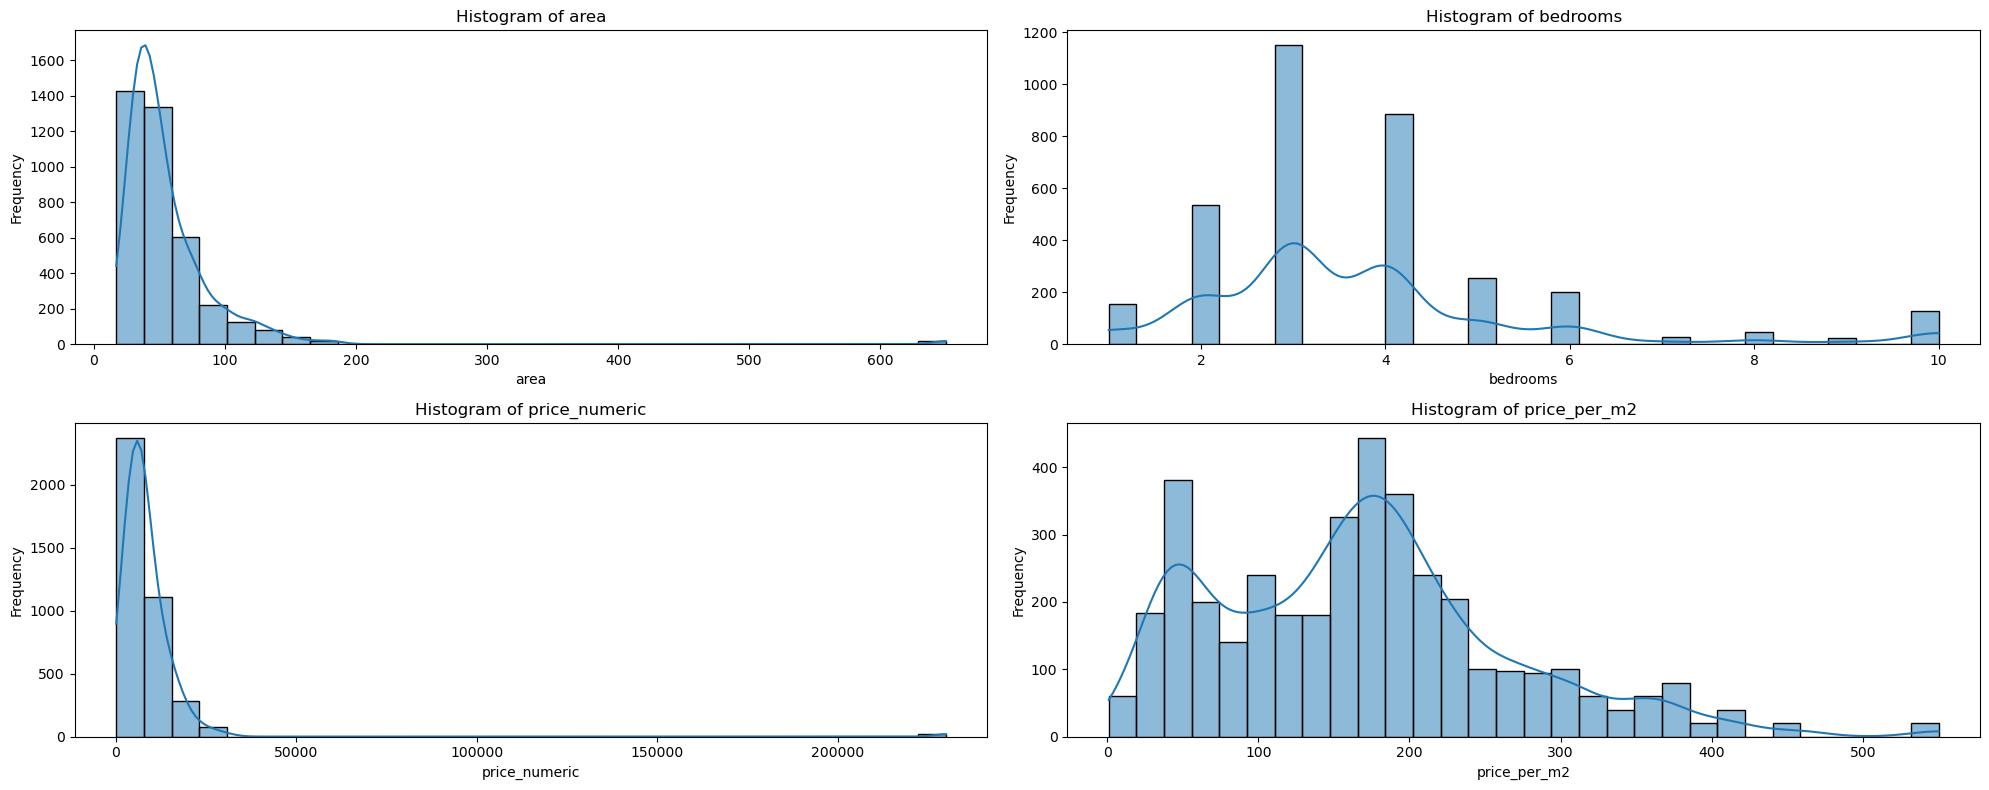

bedrooms  price_numeric  price_per_m2    area
count   3405.00        3871.00       3871.00 3871.00
mean       3.74        8979.24        167.46   56.83
std        1.85       16709.56         98.20   51.20
min        1.00         115.00          1.10   17.00
25%        3.00        4500.00         95.00   34.00
50%        3.00        6800.00        168.00   45.00
75%        4.00        9900.00        217.00   65.00
max       10.00      230000.00        550.00  650.00

In [134]:
# Plot histograms for all numeric columns to check distributions and outliers

# Select only numeric columns for histograms
numeric_cols = ['area', 'bedrooms', 'price_numeric', 'price_per_m2']

# Determine the layout for subplots
n_cols = 2  # Number of columns in subplot grid
n_rows = (len(numeric_cols) - 1) // n_cols + 1 # Calculate rows needed

plt.figure(figsize=(20, n_rows * 4)) # Adjust figure size based on number of rows

for i, col in enumerate(numeric_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
plt.show()

df.describe()

In [135]:
df.head()

Price Price per m¬≤  Space  \
0  13,9 t·ª∑    278 tr/m¬≤  50 m¬≤   
1  13,9 t·ª∑    278 tr/m¬≤  50 m¬≤   
2  13,9 t·ª∑    278 tr/m¬≤  50 m¬≤   
3  13,9 t·ª∑    278 tr/m¬≤  50 m¬≤   
4  13,9 t·ª∑    278 tr/m¬≤  50 m¬≤   

                                               Title  bedrooms property_type  \
0  L√ä TR·ªåNG T·∫§N_THANH XU√ÇN_50M_5 T·∫¶G PH√ÇN L√î_L√î G...      6.00  Nh√† ng√µ, h·∫ªm   
1  B√ÅN NH√Ä THANH L√ÇN ‚Äì NH√Ä ƒê·∫∏P 5 T·∫¶N5 ‚Äì NG√ï N√îNG ...      3.00  Nh√† ng√µ, h·∫ªm   
2  B√ÅN NHANH CƒÇN 1N +GI√Å 2.250 TR FULL N·ªòI TH·∫§T T...      1.00      Chung c∆∞   
3  CHDV M·ªÑ TR√å_62M2_7T TM_17P KK_D√íNG TI·ªÄN 95TR/T...     10.00  Nh√† ng√µ, h·∫ªm   
4  M·ª∏ ƒê√åNH_D√ÇN X√ÇY_39M 4T_50M √î T√î_2 THO√ÅNG_ G·∫¶N ...      4.00  Nh√† ng√µ, h·∫ªm   

      district_name  price_numeric  price_per_m2  area  
0   Qu·∫≠n Thanh Xu√¢n       13900.00        278.00 50.00  
1    Qu·∫≠n Ho√†ng Mai       13900.00        278.00 50.00  
2     Huy·ªán Gia L√¢m       13900.00        278.00 50.00  
3  Qu·∫≠n Nam T·ª´ Li√™m       13900.00        278.00 50.00  
4  Qu·∫≠n Nam T·ª´ Li√™m       13900.00        278.00 50.00

### Convert property type and district name to categorical code

In [136]:
# Convert address components to categorical codes for modeling/correlation
df['property_cat'] = df['property_type'].astype('category').cat.codes
df['district_cat'] = df['district_name'].astype('category').cat.codes
df.head()

Price Price per m¬≤  Space  \
0  13,9 t·ª∑    278 tr/m¬≤  50 m¬≤   
1  13,9 t·ª∑    278 tr/m¬≤  50 m¬≤   
2  13,9 t·ª∑    278 tr/m¬≤  50 m¬≤   
3  13,9 t·ª∑    278 tr/m¬≤  50 m¬≤   
4  13,9 t·ª∑    278 tr/m¬≤  50 m¬≤   

                                               Title  bedrooms property_type  \
0  L√ä TR·ªåNG T·∫§N_THANH XU√ÇN_50M_5 T·∫¶G PH√ÇN L√î_L√î G...      6.00  Nh√† ng√µ, h·∫ªm   
1  B√ÅN NH√Ä THANH L√ÇN ‚Äì NH√Ä ƒê·∫∏P 5 T·∫¶N5 ‚Äì NG√ï N√îNG ...      3.00  Nh√† ng√µ, h·∫ªm   
2  B√ÅN NHANH CƒÇN 1N +GI√Å 2.250 TR FULL N·ªòI TH·∫§T T...      1.00      Chung c∆∞   
3  CHDV M·ªÑ TR√å_62M2_7T TM_17P KK_D√íNG TI·ªÄN 95TR/T...     10.00  Nh√† ng√µ, h·∫ªm   
4  M·ª∏ ƒê√åNH_D√ÇN X√ÇY_39M 4T_50M √î T√î_2 THO√ÅNG_ G·∫¶N ...      4.00  Nh√† ng√µ, h·∫ªm   

      district_name  price_numeric  price_per_m2  area  property_cat  \
0   Qu·∫≠n Thanh Xu√¢n       13900.00        278.00 50.00            68   
1    Qu·∫≠n Ho√†ng Mai       13900.00        278.00 50.00            68   
2     Huy·ªán Gia L√¢m       13900.00        278.00 50.00             0   
3  Qu·∫≠n Nam T·ª´ Li√™m       13900.00        278.00 50.00            68   
4  Qu·∫≠n Nam T·ª´ Li√™m       13900.00        278.00 50.00            68   

   district_cat  
0            25  
1            21  
2             2  
3            24  
4            24

### Handle possible Outliers

In [137]:
# Use IQR method to filter extreme values
def remove_outliers(df, columns, multiplier=1.5):
    """Remove outliers from specified columns using IQR method"""
    df_filtered = df.copy()
    for col in columns:
        if col in df.columns and df[col].dtype in ['int64', 'float64']:
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - multiplier * IQR
            upper_bound = Q3 + multiplier * IQR
            df_filtered = df_filtered[(df_filtered[col] >= lower_bound) & 
                                      (df_filtered[col] <= upper_bound)]
    return df_filtered

# Remove outliers from numeric fields for better correlation
numeric_cols = ['price_numeric', 'price_per_m2', 'area', 'bedrooms']
df_no_outliers = remove_outliers(df, numeric_cols)
print(f"\nOriginal dataframe: {len(df)} rows")
print(f"After removing outliers: {len(df_no_outliers)} rows")



Original dataframe: 3871 rows
After removing outliers: 2467 rows


In [138]:
print("\nSummary statistics after outlier removal:")
print(df_no_outliers[numeric_cols].describe())


Summary statistics after outlier removal:
       price_numeric  price_per_m2    area  bedrooms
count        2467.00       2467.00 2467.00   2467.00
mean         6851.15        161.18   47.06      3.30
std          3647.80         83.30   17.87      0.87
min           115.00          1.10   17.00      2.00
25%          4420.00         99.00   33.00      3.00
50%          6200.00        167.00   42.00      3.00
75%          8300.00        211.00   57.00      4.00
max         17900.00        397.00  105.00      5.00


### Histogram after removal

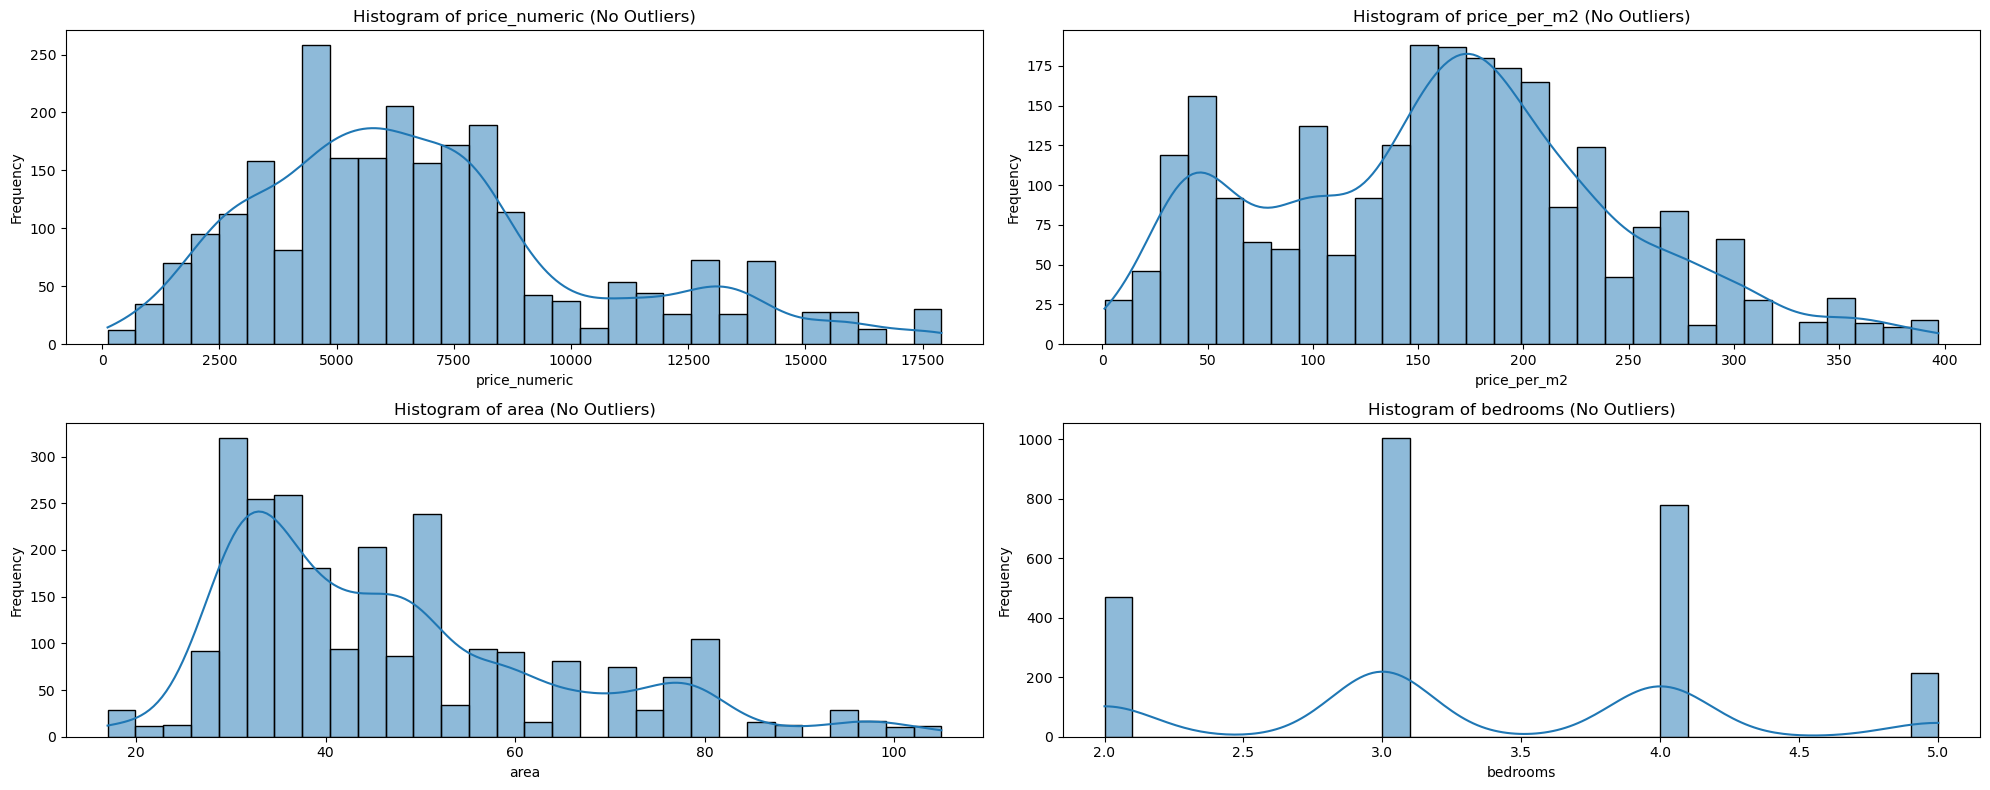

In [139]:
# Plot histograms for the columns after outlier removal
plt.figure(figsize=(20, n_rows * 4)) # n_rows and n_cols are defined in the previous histogram cell

for i, col in enumerate(numeric_cols): # Use the same outlier_columns list
    plt.subplot(n_rows, n_cols, i + 1)
    sns.histplot(df_no_outliers[col], kde=True, bins=30)
    plt.title(f'Histogram of {col} (No Outliers)')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## Correlation with price per m2


Correlation with price_per_m2:
               price_per_m2
price_per_m2           1.00
price_numeric          0.82
district_cat           0.07
bedrooms               0.06
property_cat           0.05


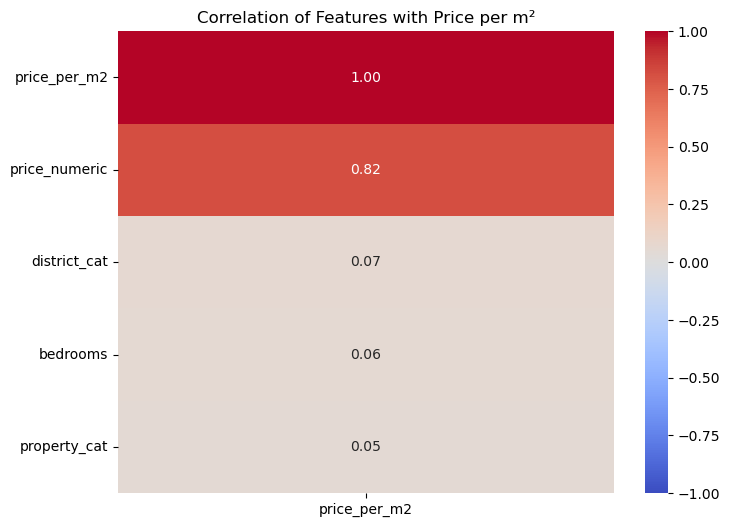

In [140]:
# Calculate correlation with price_per_m2
# Select relevant columns for correlation
# Exclude original price, address, non-encoded address parts, area, and price_converted
correlation_cols = ['bedrooms', 'price_numeric', 'property_cat', 'district_cat', 'price_per_m2']

# Ensure all selected columns are present in df_no_outliers
existing_correlation_cols = [col for col in correlation_cols if col in df_no_outliers.columns]

if not existing_correlation_cols or 'price_per_m2' not in existing_correlation_cols:
    print("Price_per_m2 or other critical columns for correlation are missing from df_no_outliers.")
else:
    correlation_matrix = df_no_outliers[existing_correlation_cols].corr()
    price_per_m2_corr = correlation_matrix[['price_per_m2']].sort_values(by='price_per_m2', ascending=False)

    print("\nCorrelation with price_per_m2:")
    print(price_per_m2_corr)

    # Plotting the correlation
    plt.figure(figsize=(8, 6))
    sns.heatmap(price_per_m2_corr, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
    plt.title('Correlation of Features with Price per m¬≤')
    plt.show()

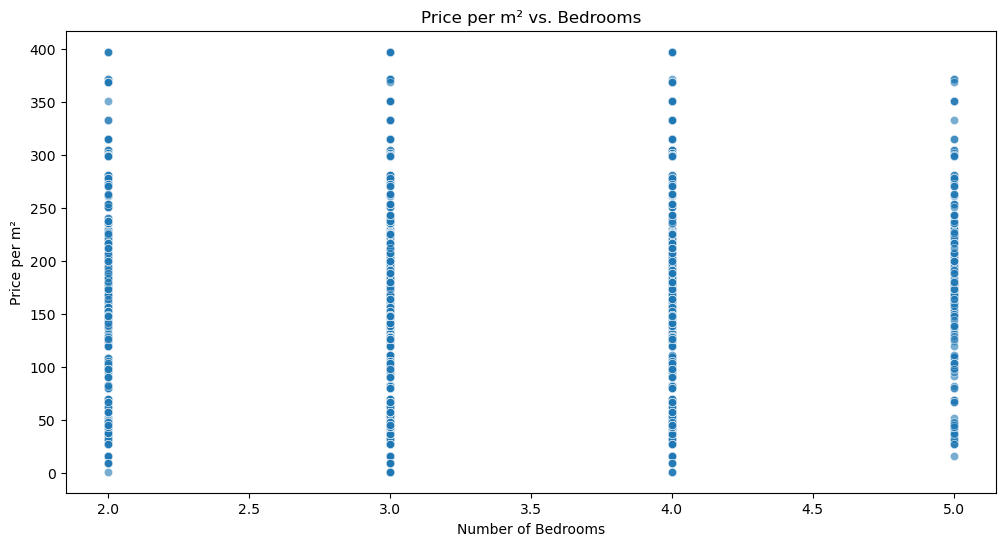

In [141]:
# Plot bedrooms against price_per_m2
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_no_outliers, x='bedrooms', y='price_per_m2', alpha=0.6)
plt.title('Price per m¬≤ vs. Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price per m¬≤')
plt.show()

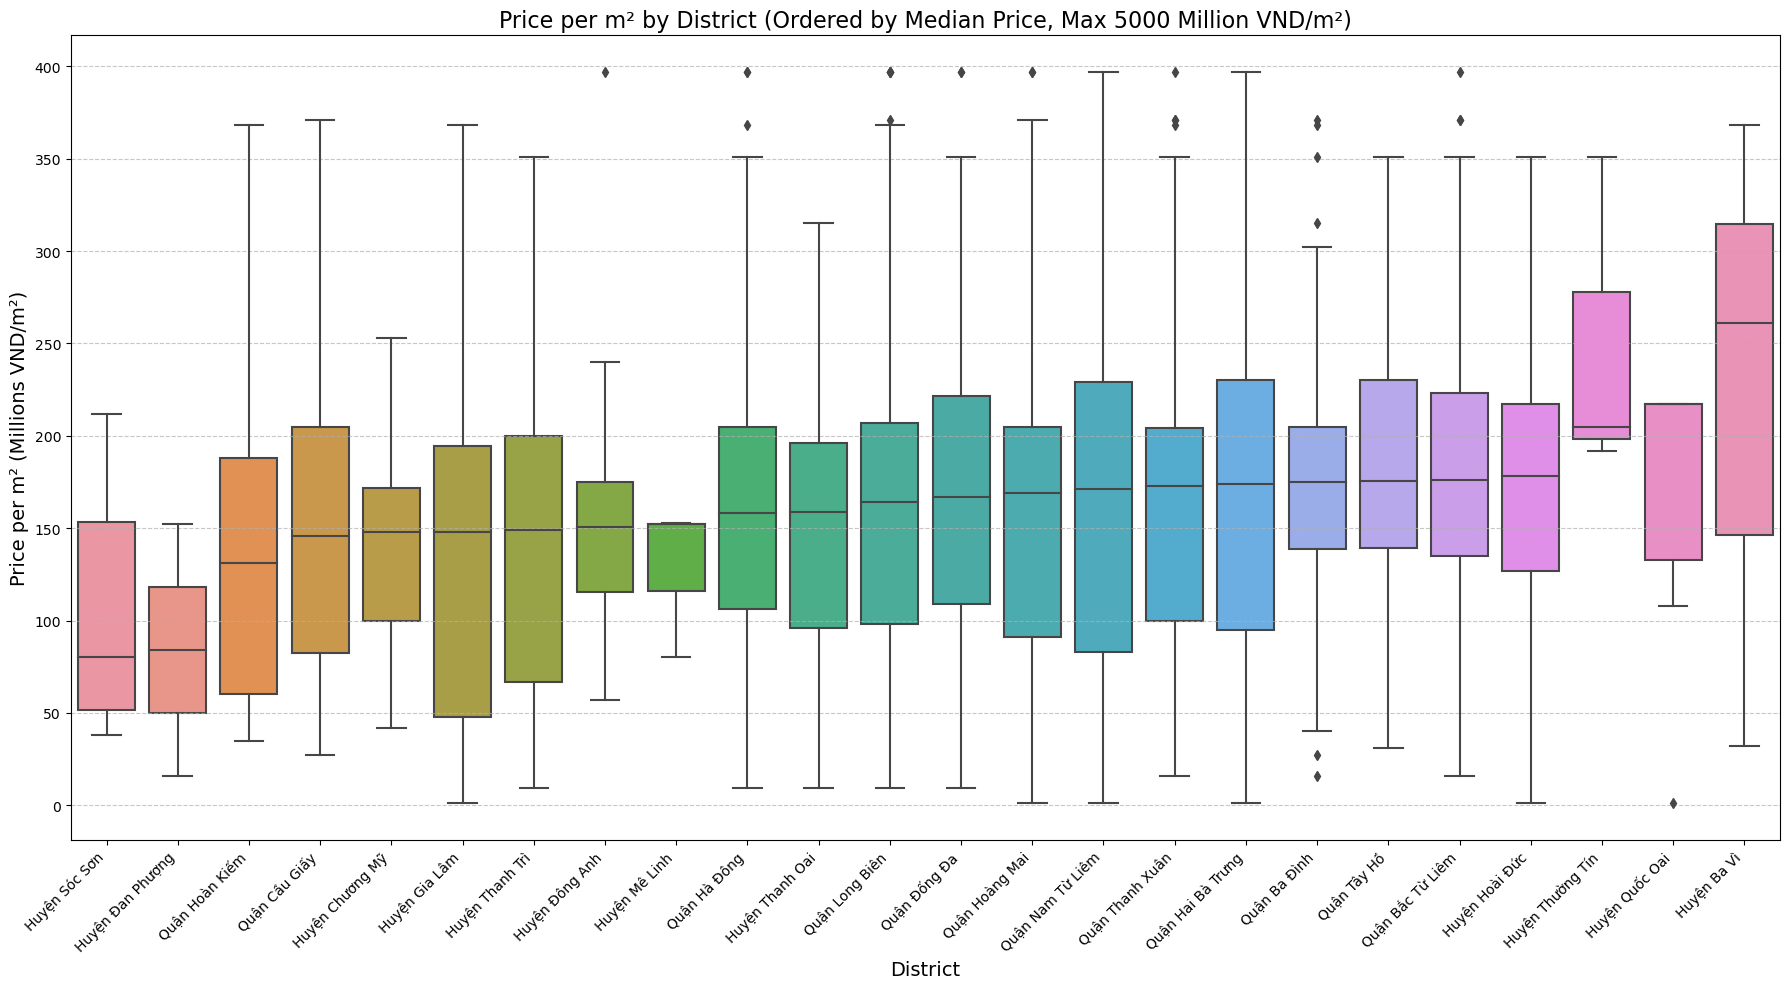

In [145]:
# Price per m¬≤ by district, limited to 5000 million VND

# Filter out outliers where price_per_m2 > 5000
df_filtered_price = df_no_outliers[df_no_outliers['price_per_m2'] <= 5000]

# Calculate the median price_per_m2 for each district to order them using the filtered data
if 'district_name' in df_filtered_price.columns and 'price_per_m2' in df_filtered_price.columns:
    median_prices = df_filtered_price.groupby('district_name')['price_per_m2'].median().sort_values()
    ordered_districts = median_prices.index

    plt.figure(figsize=(18, 10)) # Increased figure size for better readability
    sns.boxplot(data=df_filtered_price, x='district_name', y='price_per_m2', order=ordered_districts)
    plt.title('Price per m¬≤ by District (Ordered by Median Price, Max 5000 Million VND/m¬≤)', fontsize=16)
    plt.xticks(rotation=45, ha='right', fontsize=10) # Adjusted rotation and alignment for better label visibility
    plt.xlabel('District', fontsize=14)
    plt.ylabel('Price per m¬≤ (Millions VND/m¬≤)', fontsize=14)
    plt.grid(axis='y', linestyle='--', alpha=0.7) # Added a light grid for the y-axis
    plt.tight_layout() # Adjust layout to prevent labels from overlapping    plt.show()
else:
    print("Columns 'district' or 'price_per_m2' not found in the filtered DataFrame, or the filtered DataFrame is empty.")
